# Model-based reinforcement learning
Ben Mann and Andrew Schreiber
### Motivation

Model-based learning 

- may be more introspectable than model-free learning. 
- is outperforming model-free learning at irreversible games (see [Sokoban imagination](https://arxiv.org/pdf/1707.06203.pdf)). It hasn't successfully been applied to Atari. 
- algorithms can be informed that part of the training space is untouchable (i.e. don’t simulate human minds being tortured, we can tell you ahead of time that is bad). 

### Summary of idea

DQN learns on CartPole much faster when input is [velocity, position, angle, angular velocity] vs pixels.

Can we use an unsupervised generative model to collapse a high dimensional state representation to speed up model-free learning? Evaluate on classic control problems and basic Atari games.

### Related work

[5] uses a deep VAE to learn a low-dimensional representation of classic control problems, but doesn't use reinforcement learning on top of it.

[7] and [9] build on Atari next video frame prediction [6] but fail to beat DQN performance.

[8] merges model-based and model-free techniques but doesn't report Atari success.

[2] uses the idea of combining model-based and model-free techniques for the purpose of data efficiency, but it doesn't operate on pixels, and in mujoco state + action should perfectly predict next state unlike atari where other agents can do stuff

  

So the big difference here is that we're aiming to beat DQN at data efficiency on Atari using an approximation of f(s, a) -&gt; s'. We start with CartPole to validate the approach and move on to Pong.

### Project Roadmap / ideas

1. [Cartpole](https://arxiv.org/pdf/1602.01783v1.pdf), [MountainCar](https://gym.openai.com/envs/MountainCar-v0), [Pendulum](https://gym.openai.com/envs/Pendulum-v0) 
    1. A2C on dense representation learns fast (upper bound of learning speed). Compare to 
        1. A2C trained on autoencoder-learned dense representation 
        2. A2C trained on pixels directly 

2. Pong 
    1. Is a dense representation learned from full-resolution color better than from downsample? 
        1. How much does model capacity matter as input resolution varies? 

    2. Can we learn faster than from pixels? 
    3. [This Stanford group failed to beat DQN](http://cs231n.stanford.edu/reports/2016/pdfs/116_Report.pdf) [9]. They say it's because compounding errors made long-term prediction hard, and pong and breakout have very long (>50) timestep dependencies. Seems like we could get around this by 
        1. predicting N steps ahead in one forward pass and
        2. feed all N steps into model a la I2A [8] so that later frames can be discarded dynamically.
    4. Can we do long-range, cheap rollouts using [dilated convolutions](http://www.inference.vc/dilated-convolutions-and-kronecker-factorisation/) [11]? Sokoban noted even 5-step rollouts were quite expensive 

3. Breakout(?) 
    1. Might be easier than pong due to denser rewards 

4. Montezuma (stretch goal) 
    1. Try adding noise to the input image, train an Inspector 
    2. Detect abnormally high variance in autoencoder's decoded output frame, use that as a signal to update model 
    3. Train new autoencoder per room, auto-detect when out of distribution a la "Modular Multitask Reinforcement Learning with Policy Sketches" [https://arxiv.org/abs/1611.01796v2](https://arxiv.org/abs/1611.01796v2) 
    4. Use an ensemble of autoencoders so that any of them can be swapped out or modified and agent still performs 

### Concrete steps

1. Run env (CartPole-v0, Pendulum, MountainCar) 
2. Generate training data for autoencoder model using pre-trained DQN / random agent interpolation to maximize search space 
3. Train autoencoder to repro -- a/b split here 
    1. a frame 
    2. Sequence of frames 

4. Use dense autoencoder representation to preprocess frames and train a model 
5. Compare to upper and lower bound baselines (A2C trained on "classic control" signals and A2C trained on pixels) 

### Additional questions

1. Does the learned autoencoder representation correlate with the real 4 dimensional cartpole observation? Chart r^2 for all combinations of variables. Chart scatter x vs y. 
2. For a random input state, what is the delta in the decoded representation given one action vs the other? If it's small, can we add a term to the loss to make it larger? 
3. How do loss and computational cost differ given different initial downsampling? Can we get away with preserving more detail? Does using 2 frame stack instead of 4 help? 
4. How quickly do imagination rollouts drift? How bad do they look? 
5. Would hard attention be an effective dimensionality reducer since most of the space is blank? 
6. How much better is VAE vs vanilla AE? 
  

### Literature review

1. Learning Multimodal Transition Dynamics for Model-Based Reinforcement Learning [https://arxiv.org/abs/1705.00470v2](https://arxiv.org/abs/1705.00470v2) 
2. Neural Network Dynamics for Model-Based Deep Reinforcement Learning with Model-Free Fine-Tuning [https://arxiv.org/abs/1708.02596v1](https://arxiv.org/abs/1708.02596v1) 
3. Neural Fitted Q Iteration - First Experiences with a Data Efficient Neural Reinforcement Learning Method [https://pdfs.semanticscholar.org/2820/01869bd502c7917db8b32b75593addfbbc68.pdf](https://pdfs.semanticscholar.org/2820/01869bd502c7917db8b32b75593addfbbc68.pdf) 
4. Deep Auto-Encoder Neural Networks in Reinforcement Learning [http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.172.1873&rep=rep1&type=pdf](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.172.1873&rep=rep1&type=pdf) 
5. Embed to Control: A Locally Linear Latent Dynamics Model for Control from Raw Images [http://papers.nips.cc/paper/5964-embed-to-control-a-locally-linear-latent-dynamics-model-for-control-from-raw-images.pdf](http://papers.nips.cc/paper/5964-embed-to-control-a-locally-linear-latent-dynamics-model-for-control-from-raw-images.pdf) 
6. A Deep Learning Approach for Joint Video Frame and Reward Prediction in Atari Games [https://arxiv.org/abs/1611.07078](https://arxiv.org/abs/1611.07078) 
7. Action-Conditional Video Prediction using Deep Networks in Atari Games [https://arxiv.org/abs/1507.08750](https://arxiv.org/abs/1507.08750) 
8. Imagination-Augmented Agents for Deep Reinforcement Learning [https://arxiv.org/abs/1707.06203](https://arxiv.org/abs/1707.06203) 
9. Model-Based Reinforcement Learning for Playing Atari Games [http://cs231n.stanford.edu/reports/2016/pdfs/116_Report.pdf](http://cs231n.stanford.edu/reports/2016/pdfs/116_Report.pdf) 
10. Learning model-based planning from scratch [https://arxiv.org/pdf/1708.02596v1.pdf](https://arxiv.org/pdf/1708.02596v1.pdf) 
11. Temporal Convolutional Policy Networks [https://bcourses.berkeley.edu/files/70257152/download](https://bcourses.berkeley.edu/files/70257152/download)

## Data collection
Originally we thought that to train a good environment model, we should start collecting data with a pre-trained agent, then gradually degrade that agent's performance to random by introducing more and more random actions instead of what the agent suggests. In a real world task, you can imagine using human demonstrations to generate the world model instead.

For Cartpole, it seems the state space is pretty well explored by completely random actions, so we never bothered.

In [3]:
import time
import numpy as np
import gym
from tqdm import tqdm_notebook
from skimage.transform import resize
%load_ext autoreload
%autoreload 2

env = gym.make('CartPole-v0')

[2017-09-19 09:47:31,707] Making new env: CartPole-v0


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
def preprocess(im):
    return np.uint8(resize(np.mean(im, axis=-1), (im.shape[0]/4,im.shape[1]/4), mode='edge'))

print(env.action_space, env.observation_space, env.observation_space.high.shape)
frames, rewards, actions, observations = [], [], [], []
n_frames = 0
# CartPole ends at 200, but useful for other envs?
MAX_FRAMES_PER_EPISODE = 1000
# ~2GB of data for CartPole
FRAMES_TO_COLLECT = 66000

t = time.time()
with tqdm_notebook(total=FRAMES_TO_COLLECT) as pbar:
    while n_frames < FRAMES_TO_COLLECT:
        observation = env.reset()
        fs = []
        rs = []
        as_ = []
        os = []
        for _ in range(MAX_FRAMES_PER_EPISODE):
            fs.append(preprocess(env.render(mode = 'rgb_array')))
            action = env.action_space.sample()
            observation, reward, done, _ = env.step(action)
            as_.append(action)
            rs.append(reward)
            os.append(observation)
            n_frames += 1
            if done:
                frames.append(fs)
                rewards.append(rs)
                actions.append(as_)
                observations.append(os)
                pbar.update(len(fs))
                break

Discrete(2) Box(4,) (4,)


In [10]:
# Save the data
env_name = 'cartpole'
np.save('%s_frames' % env_name, frames)
np.save('%s_rewards' % env_name, rewards)
np.save('%s_observations' % env_name, observations)
np.save('%s_actions' % env_name, actions)

## Sanity check the data

Shape of stacked frames (66015, 100, 150)
Range of values 0 to 255
Bounding box (43, 78, 32, 120)


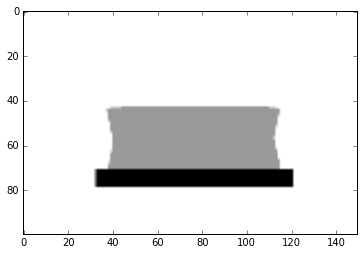

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

all_frames = np.vstack(np.stack(x) for x in frames)
print('Shape of stacked frames', all_frames.shape)
combined = np.min(all_frames, axis=0)
plt.imshow(combined, cmap='gray', vmin=0, vmax=255)
print('Range of values', np.min(combined), 'to', np.max(combined))
def bbox(img):
    '''Returns y_min, y_max, x_min, x_max
    
    https://stackoverflow.com/a/31402351/614529
    '''
    a = np.where(img != 255)
    bounds = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    return bounds
# This would be useful if we wanted to reduce input dimensionality 
# by cropping away the extra whitespace.
print('Bounding box', bbox(combined))

## Build the environment model
Next, we use this collected data to train an autoencoder that takes a stack of frames and actions as inputs and outputs the next frame. This architecture requires no domain-specific information, though for games like Atari the framestack needs to be 4 frames deep to still pick up dynamics despite flickering.

For a simple autoencoder we started with https://blog.keras.io/building-autoencoders-in-keras.html and modified it to our purposes. Key things to note:
1. Dimensions matter! When scaling down and back up again, if the input dimensions don't evenly divide by the max pool layers or stride, when you scale back up, the dimensions won't match. E.g., 20//3 = 6, 6 * 3 = 18, 18 != 20. Two ways to get around this are
  1. Scale your inputs to a number that's properly divisible (expensive)
  1. Crop your inputs to a divisible number
  1. Pad your inputs to get to a divisible number (best, since it doesn't require any domain knowledge)
1. Convolutions don't work on framestacks, so we use a TimeDistributed layer wrapper to get around that. After everything gets flattened and fed into the dense layers, there's a chance for the environment dynamics to be processed. We could have put the frame stacks in the channel dimension but this seemed like a more general solution in case we wanted to use colors for some other environment.
1. Initially we just concatenated the action (0 or 1 in CartPole) with the input to the bottleneck layer, but this didn't give the network enough flexibility to condition the outputs appropriately, nor would it scale to different number of actions. Instead, we one-hot encode the actions per standard practice and put a few Dense layers in front of them. We also tried tiling the actions per Deepmind's I2A, but it seemed like a waste of computation and had worse performance.
1. The data is big enough that we have to get it in batches using `fit_generator`, else even my 64GB RAM machine OOM's.
  

In [12]:
from autoencoder import load_data, make_model, train
_, windowed_frames, windowed_frames_next, windowed_actions = load_data(window=3)
model = make_model(windowed_frames)
train(model, windowed_frames, windowed_frames_next, windowed_actions)

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 96, 144, 1) 0                                            
____________________________________________________________________________________________________
time_distributed_1 (TimeDistribu (None, 3, 96, 144, 16 160         input_1[0][0]                    
____________________________________________________________________________________________________
time_distributed_2 (TimeDistribu (None, 3, 48, 72, 16) 0           time_distributed_1[0][0]         
____________________________________________________________________________________________________
time_distributed_3 (TimeDistribu (None, 3, 48, 72, 16) 2320        time_distributed_2[0][0]         
___________________________________________________________________________________________